In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns

blues = ["#0d88e6", "#8ECDDD", "#22668D", "#42d4f4", ]
COLORS_20 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c',
             '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
             '#000075', '#808080', '#ffffff', '#000000']
semi_balck = '#4F6272'

In [3]:
import matplotlib
plt.rcParams.update(matplotlib.rcParamsDefault)

In [4]:
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '3'
n_features =6
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"retina_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/retina_xor_multi_arch/{res_folder}"

In [5]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-10-24-10-00-54_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"

In [6]:
lgbm_folder_name = 'exp_2023-11-27-15-51-15_nice_features'
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [6]:
corrlated_features_values = pd.read_csv(
    f"{results_path}/{res_folder}/feature_correlation/2023-11-28-16-07-16_all_data.csv")
correlated_features_csv_name = "2023-11-28-13-17-26_feature_correlation.csv"
correlated_features = pd.read_csv(f"{results_path}/{res_folder}/feature_correlation/{correlated_features_csv_name}",
                                  index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/noamaz/modularity/retina_xor//retina_3_layers/feature_correlation/2023-11-28-16-07-16_all_data.csv'

In [7]:
first_analsis = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
first_analsis.shape

(49823, 28)

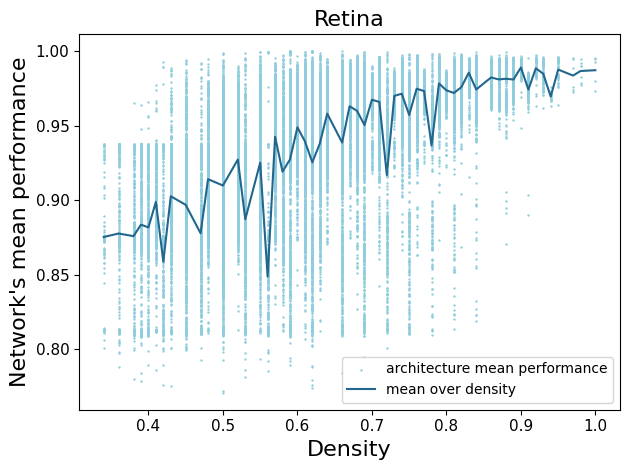

In [8]:
x_metric_name = 'density'
y_metric_name = 'mean_performance'

x_data = first_analsis[x_metric_name]
means_y = []
mean_x = []
for x in sorted(first_analsis[x_metric_name].unique()):
    means_y.append(first_analsis[y_metric_name][x_data == x].mean())
    mean_x.append(x)
#x_data = x_data + np.random.normal(-0.008, 0.008, x_data.shape[0])
plt.scatter(x_data, first_analsis[y_metric_name], c=blues[1], s=0.5, label='architecture mean performance')

plt.plot(mean_x, means_y, c=blues[2], label='mean over density')
plt.legend()
plt.ylabel("Network's mean performance", fontsize=16)
plt.xlabel('Density', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}.png")
plt.show()

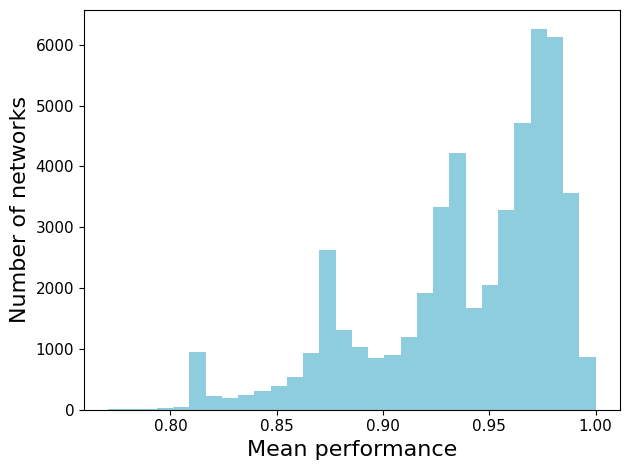

In [9]:
plt.hist(first_analsis['mean_performance'], color=blues[1], bins=30)
plt.xlabel('Mean performance', fontsize=16)
plt.ylabel('Number of networks', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.title(f"{task.capitalize()}", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_mean_performance_hist.png")
plt.show()

In [10]:
neurons_feature_names = [f'neurons_in_layer_{i}' for i in range(1, int(num_layers))]
dims = [f"{i}_{j}" for i, j, in first_analsis[neurons_feature_names].values.tolist()]
dims.sort()
dims_to_num = {
    dim: i + 1
    for i, dim in enumerate(set(dims))
}
first_analsis['dims'] = dims

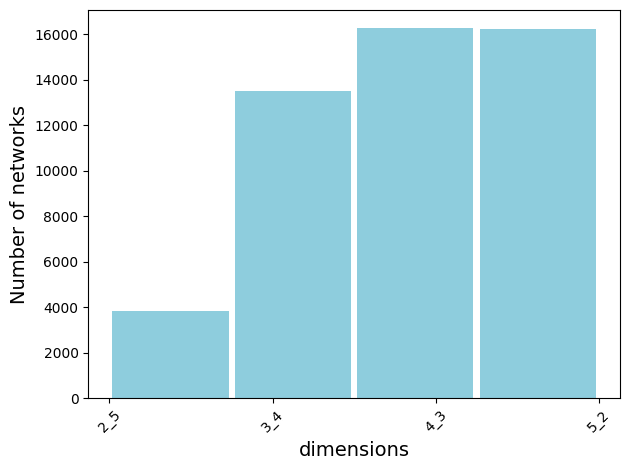

In [11]:
plt.hist(first_analsis['dims'], color=blues[1], bins=len(set(dims)), align='mid', rwidth=0.95)
plt.xticks(rotation=45)
plt.xlabel('dimensions', fontsize=14)
plt.ylabel('Number of networks', fontsize=14)
#axs[k].set_xlabel(f_name,  fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_dims_hist.png")
plt.show()

In [12]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/6_feature_values.csv").drop("Unnamed: 0", axis=1)

In [13]:
selected_feature_names = list(selected_features_res.columns)[:-1]

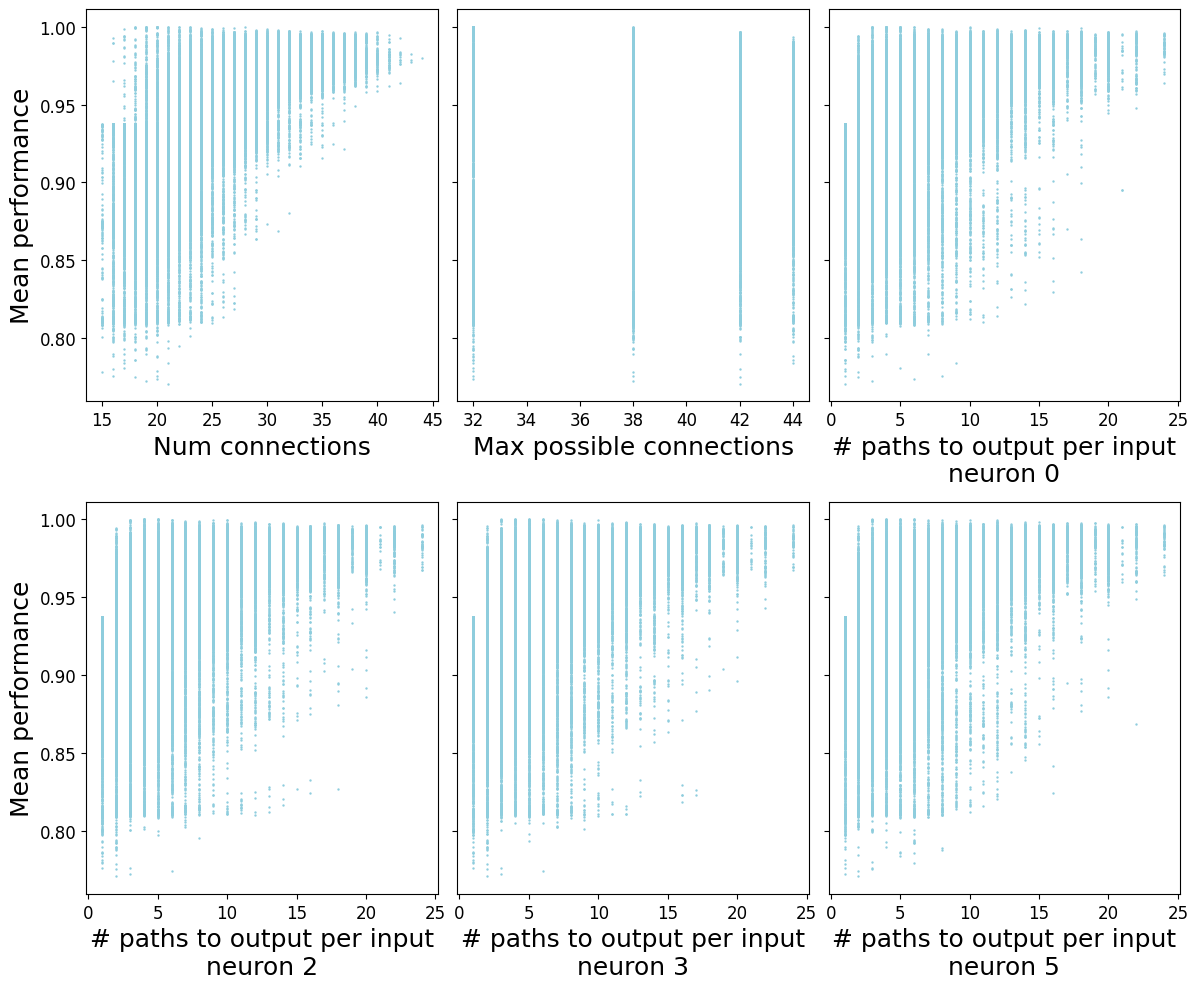

In [14]:
num_columns = int(np.ceil(len(selected_feature_names) / 3))
fig, axs = plt.subplots(num_columns, 3, figsize=(12, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[i, j].scatter(x_data, selected_features_res['label'],c=blues[1], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:22]}\n{f_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    axs[i, j].set_xlabel(f"{name.capitalize()}", fontsize=18)
    #axs[i, j].set_ylim(0,1)
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
axs[1, 0].set_ylabel(f"Mean performance", fontsize=18)
axs[0, 0].set_ylabel(f"Mean performance", fontsize=18)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_six_fetaures_dist.png")


In [7]:
for file in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"):
    if 'feature_selectio' in file:
        feature_selection = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}")
lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/teach_archs_regression_feature_selection_results"
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_res = pd.concat([feature_selection_res, temp], ignore_index=True)
feature_selection_res = feature_selection_res.sort_values('num_features')

In [8]:
feature_selection_res

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features
6,0,487,0.029297,0.028916,0.000035,0.000036,0.346983,0.363591,1
4,0,310,0.027740,0.026277,0.000034,0.000033,0.411047,0.453572,2
3,0,451,0.024021,0.024269,0.000030,0.000031,0.524332,0.516025,3
1,0,421,0.019975,0.019902,0.000026,0.000026,0.657353,0.655019,4
7,0,497,0.017462,0.018204,0.000023,0.000024,0.732254,0.708732,5
9,0,457,0.016752,0.017062,0.000022,0.000023,0.752990,0.743534,6
10,0,497,0.016593,0.016881,0.000021,0.000022,0.765228,0.750262,7
8,0,491,0.016662,0.016298,0.000021,0.000022,0.768942,0.766173,8
14,0,499,0.014103,0.014989,0.000018,0.000020,0.831922,0.802530,10
5,0,469,0.011949,0.012344,0.000015,0.000016,0.889006,0.871468,20


In [60]:
max_features_mape =feature_selection_res['best mape test'][feature_selection_res['num_features'] == feature_selection_res['num_features'].max()].item()
feature_selection_res['mape_ratio_min'] = feature_selection_res['best mape test'].min() / feature_selection_res['best mape test']
feature_selection_res['r2_ratio_max'] =  feature_selection_res['best r2 test'] / feature_selection_res['best r2 test'].max()

feature_selection_res['mape_ops_ratio_min'] = feature_selection_res['best mape test'] / feature_selection_res['best mape test'].min()
feature_selection_res['mape_ratio'] = max_features_mape / feature_selection_res['best mape test']
feature_selection_res['mape_ops_ratio'] = feature_selection_res['best mape test'] / max_features_mape
feature_selection_res[['mape_ratio', 'mape_ops_ratio', 'mape_ratio_min', 'mape_ops_ratio_min','best mape test','best r2 test', 'r2_ratio_max', 'num_features']]

,mape_ratio,mape_ops_ratio,mape_ratio_min,mape_ops_ratio_min,best mape test,best r2 test,r2_ratio_max,num_features
6,0.424892,2.353538,0.412825,2.422333,0.028916,0.363591,0.415023,1
4,0.467570,2.138718,0.454291,2.201234,0.026277,0.453572,0.517732,2
3,0.506251,1.975305,0.491873,2.033045,0.024269,0.516025,0.589019,3
1,0.617341,1.619851,0.599808,1.667200,0.019902,0.655019,0.747674,4
7,0.674900,1.481701,0.655733,1.525012,0.018204,0.708732,0.808985,5
9,0.720108,1.388680,0.699657,1.429272,0.017062,0.743534,0.848710,6
10,0.727814,1.373978,0.707143,1.414140,0.016881,0.750262,0.856390,7
8,0.753862,1.326503,0.732452,1.365278,0.016298,0.766173,0.874552,8
14,0.819690,1.219973,0.796411,1.255634,0.014989,0.802530,0.916051,10
5,0.995335,1.004686,0.967068,1.034054,0.012344,0.871468,0.994741,20


In [62]:
feature_selection_res[feature_selection_res['num_features'].isin((6,20,30))][[
    'mape_ratio_min',
    'best mape test',
        'best mape train',
    'best r2 test',
        'best r2 train',
    'r2_ratio_max',
    'num_features',
]]

,mape_ratio_min,best mape test,best mape train,best r2 test,best r2 train,r2_ratio_max,num_features
9,0.699657,0.017062,0.016752,0.743534,0.752990,0.848710,6
5,0.967068,0.012344,0.011949,0.871468,0.889006,0.994741,20
2,1.000000,0.011937,0.011109,0.876075,0.904177,1.000000,30


In [22]:
lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/exp_2023-11-27-14-40-47_nice_features/teach_archs_regression_feature_selection_results"
num_features = []
feature_selection2 = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection2 = pd.concat([feature_selection2, temp], ignore_index=True)
feature_selection2 = feature_selection2.sort_values('num_features')

In [23]:
max_features_mape =feature_selection2['best mape test'][feature_selection2['num_features'] == feature_selection2['num_features'].max()].item()
feature_selection2['mape_ratio_min'] = feature_selection2['best mape test'].min() / feature_selection2['best mape test']
feature_selection2['mape_ops_ratio_min'] = feature_selection2['best mape test'] / feature_selection2['best mape test'].min()
feature_selection2['mape_ratio'] = max_features_mape / feature_selection2['best mape test']
feature_selection2['mape_ops_ratio'] = feature_selection2['best mape test'] / max_features_mape
feature_selection2[['mape_ratio', 'mape_ops_ratio', 'mape_ratio_min', 'mape_ops_ratio_min','best mape test', 'num_features']]

,mape_ratio,mape_ops_ratio,mape_ratio_min,mape_ops_ratio_min,best mape test,num_features
15,0.453919,2.203037,0.437659,2.284882,0.026832,1
2,0.474519,2.107397,0.457522,2.185689,0.025667,2
14,0.581115,1.720830,0.560299,1.784761,0.020959,3
13,0.587331,1.702618,0.566292,1.765873,0.020737,4
9,0.614020,1.628610,0.592026,1.689115,0.019836,5
11,0.641293,1.559351,0.618321,1.617283,0.018992,6
0,0.682549,1.465095,0.658100,1.519526,0.017844,7
3,0.706537,1.415355,0.681228,1.467937,0.017239,8
6,0.779311,1.283185,0.751396,1.330857,0.015629,10
8,0.996415,1.003598,0.960723,1.040883,0.012224,20


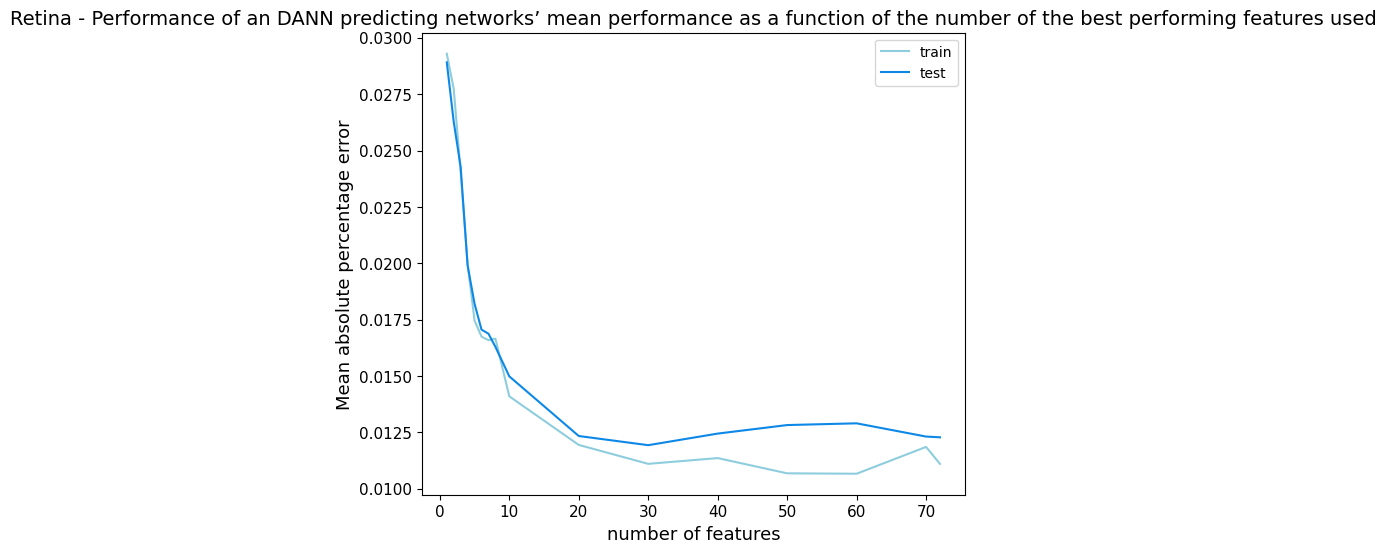

In [52]:
plt.figure(figsize=(7,6),)
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=blues[1])
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=blues[0])

plt.xlabel('number of features', fontsize=13)
plt.ylabel(f'Mean absolute percentage error', fontsize=13)
plt.legend()
plt.title(
    f"{task.capitalize()} - Performance of an DANN predicting networks’ mean performance as a function of the number of the best performing features used",
    wrap=True, fontsize=14)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [38]:
glob_inds = []
feature_selection_res_by_glob = pd.DataFrame()
for folder_name in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality"):
    glob_ind = folder_name.split('glob_')[1].replace('_', '.')
    glob_inds.append(glob_ind)
    lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality/{folder_name}/teach_archs_regression_feature_selection_results"
    for file_name in os.listdir(lgb_res_nn_path):
        if 'best.csv' not in file_name:
            continue
        temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
        temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
        temp['glob_ind'] = glob_ind
        feature_selection_res_by_glob = pd.concat([feature_selection_res_by_glob, temp], ignore_index=True)
feature_selection_res_by_glob = feature_selection_res_by_glob.sort_values(['glob_ind', 'num_features'])

In [37]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
sorted_blues = ["#22668D", "#0d88e6", "#42d4f4", "#8ECDDD", ]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 10]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 10]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
         label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0] + 1)[::2])
ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0] + 1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

['with_inv',
 'exp_2023-11-28-18-09-51_nice_features_glob_1',
 'exp_2023-11-28-18-09-51_nice_features_glob_0_75',
 'exp_2023-11-28-18-09-51_nice_features_glob_0_5',
 'exp_2023-11-28-18-09-51_nice_features_glob_0']

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_8206/2866640114.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind']==ind][feature_selection_res_by_glob['num_features']<=40]


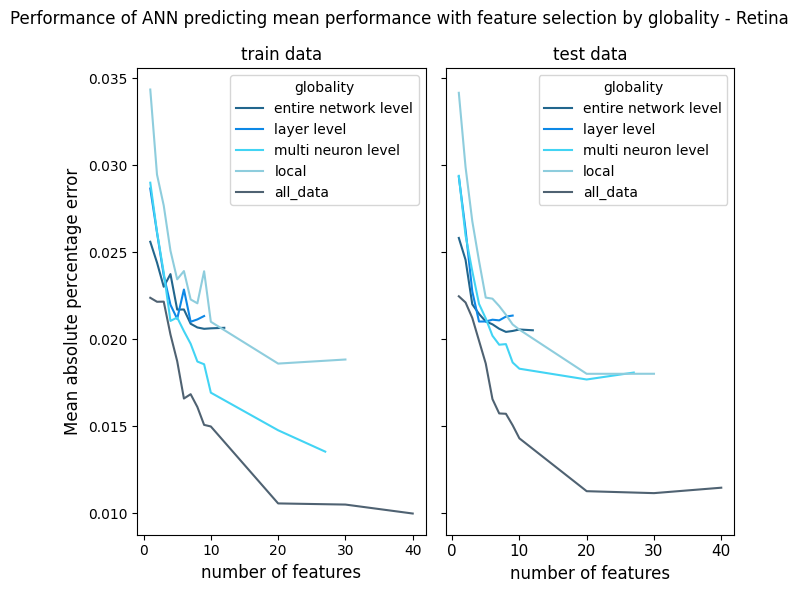

In [243]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
sorted_blues = ["#22668D", "#0d88e6", "#42d4f4", "#8ECDDD", ]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 40]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 40]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
         label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
#ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])
#ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_long.png")
plt.show()

In [73]:
fetureas = [30, 20, 6]
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[2]}_prediction_results.csv"
model_prediction_res = pd.read_csv(model_res_path)
model_res_path_sat = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[1]}_prediction_results.csv"
model_prediction_res_set = pd.read_csv(model_res_path_sat)
model_res_path_max = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/{fetureas[0]}_prediction_results.csv"
model_prediction_res_max = pd.read_csv(model_res_path_max)

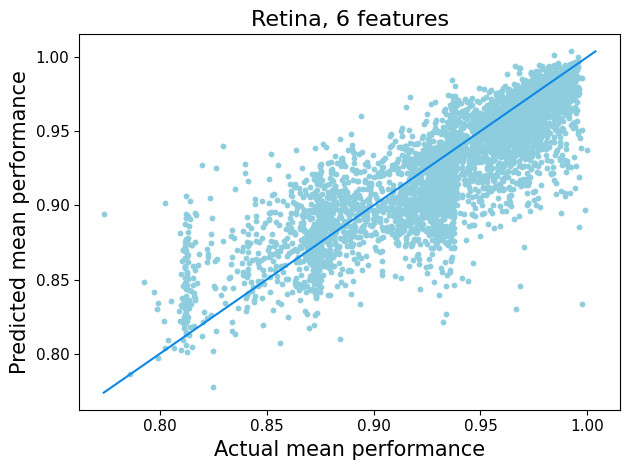

In [20]:
plt.scatter(model_prediction_res['test_label'], model_prediction_res['test_pred'], s=10, c=blues[1])
start = min(model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min())
stop = max(model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=blues[0])
plt.ylabel('Predicted mean performance', fontsize=15)
plt.xlabel('Actual mean performance', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}, 6 features",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()

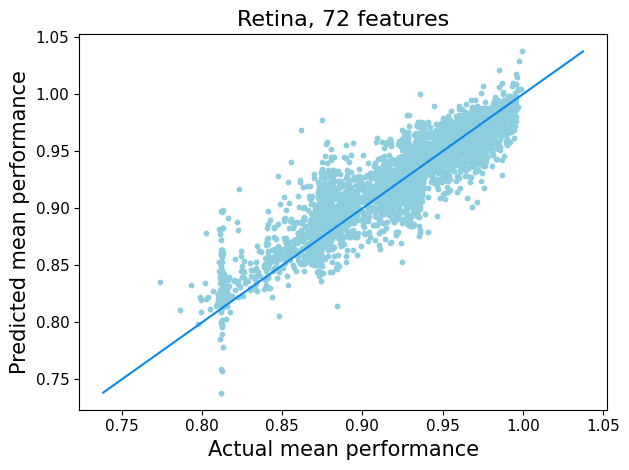

In [24]:
plt.figure()
plt.scatter(model_prediction_res_max['test_label'], model_prediction_res_max['test_pred'], s=10, c=blues[1])
start = min(model_prediction_res_max['test_label'].min(), model_prediction_res_max['test_pred'].min())
stop = max(model_prediction_res_max['test_label'].max(), model_prediction_res_max['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=blues[0])
plt.ylabel('Predicted mean performance', fontsize=15)
plt.xlabel('Actual mean performance', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}, 72 features",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual_max.png")
plt.show()

<Figure size 640x480 with 0 Axes>

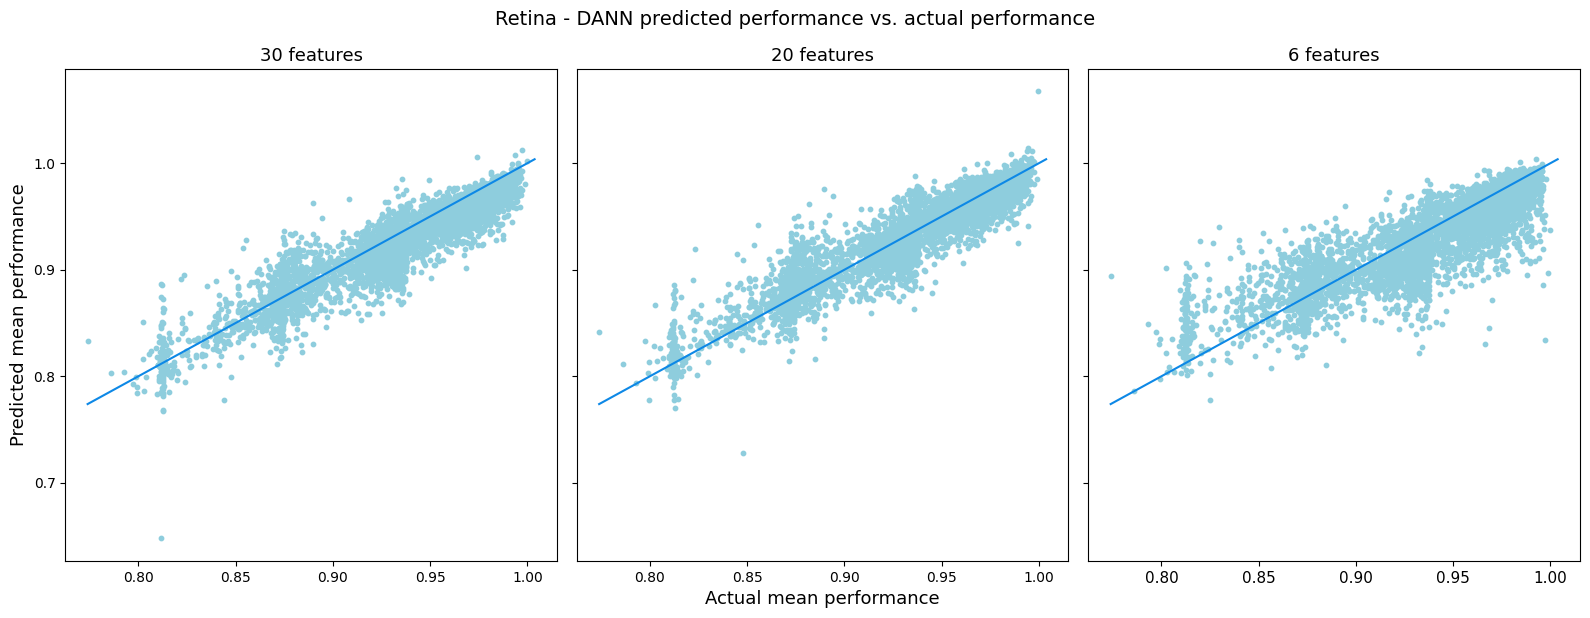

In [92]:
models =  (model_prediction_res_max, model_prediction_res_set, model_prediction_res)
start = min(min( model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min()) for model in models)
stop = max(max( model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max()) for model in models)
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,9), sharex='all', sharey='all',)

for ax, model, num_fet in zip((ax1, ax2, ax3),models, fetureas):
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=blues[1])
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=blues[0])
    ax.set_title(
    f"{num_fet} features",
    wrap=True, fontsize=13)

ax1.set_ylabel('Predicted mean performance', fontsize=13)
ax2.set_xlabel('Actual mean performance', fontsize=13)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,y=0.82,wrap=True, fontsize=14)
plt.tight_layout()

plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual_max_6.png")
plt.show()

In [132]:
def abs_percentage_error(A, F):
    abs_errors = [
        abs((a-f)/a)
    for a, f in zip(A, F)
    ]
    jumps = list(range(0, len(abs_errors), 512)) + [len(abs_errors)]
    print(jumps)
    means = [
        np.mean(abs_errors[jumps[i]:jumps[i+1]])
        for i in range(len(jumps)-1)
    ]
    return np.mean(means), np.var(abs_errors)


In [127]:
import torch
from torchmetrics.regression import MeanAbsolutePercentageError
men_a = MeanAbsolutePercentageError()

[0, 512, 1024, 1536, 2048, 2560, 3072, 3584, 4096, 4608, 4983]
tensor(0.0149)
[0, 512, 1024, 1536, 2048, 2560, 3072, 3584, 4096, 4608, 4983]
tensor(0.0122)
[0, 512, 1024, 1536, 2048, 2560, 3072, 3584, 4096, 4608, 4983]
tensor(0.0186)


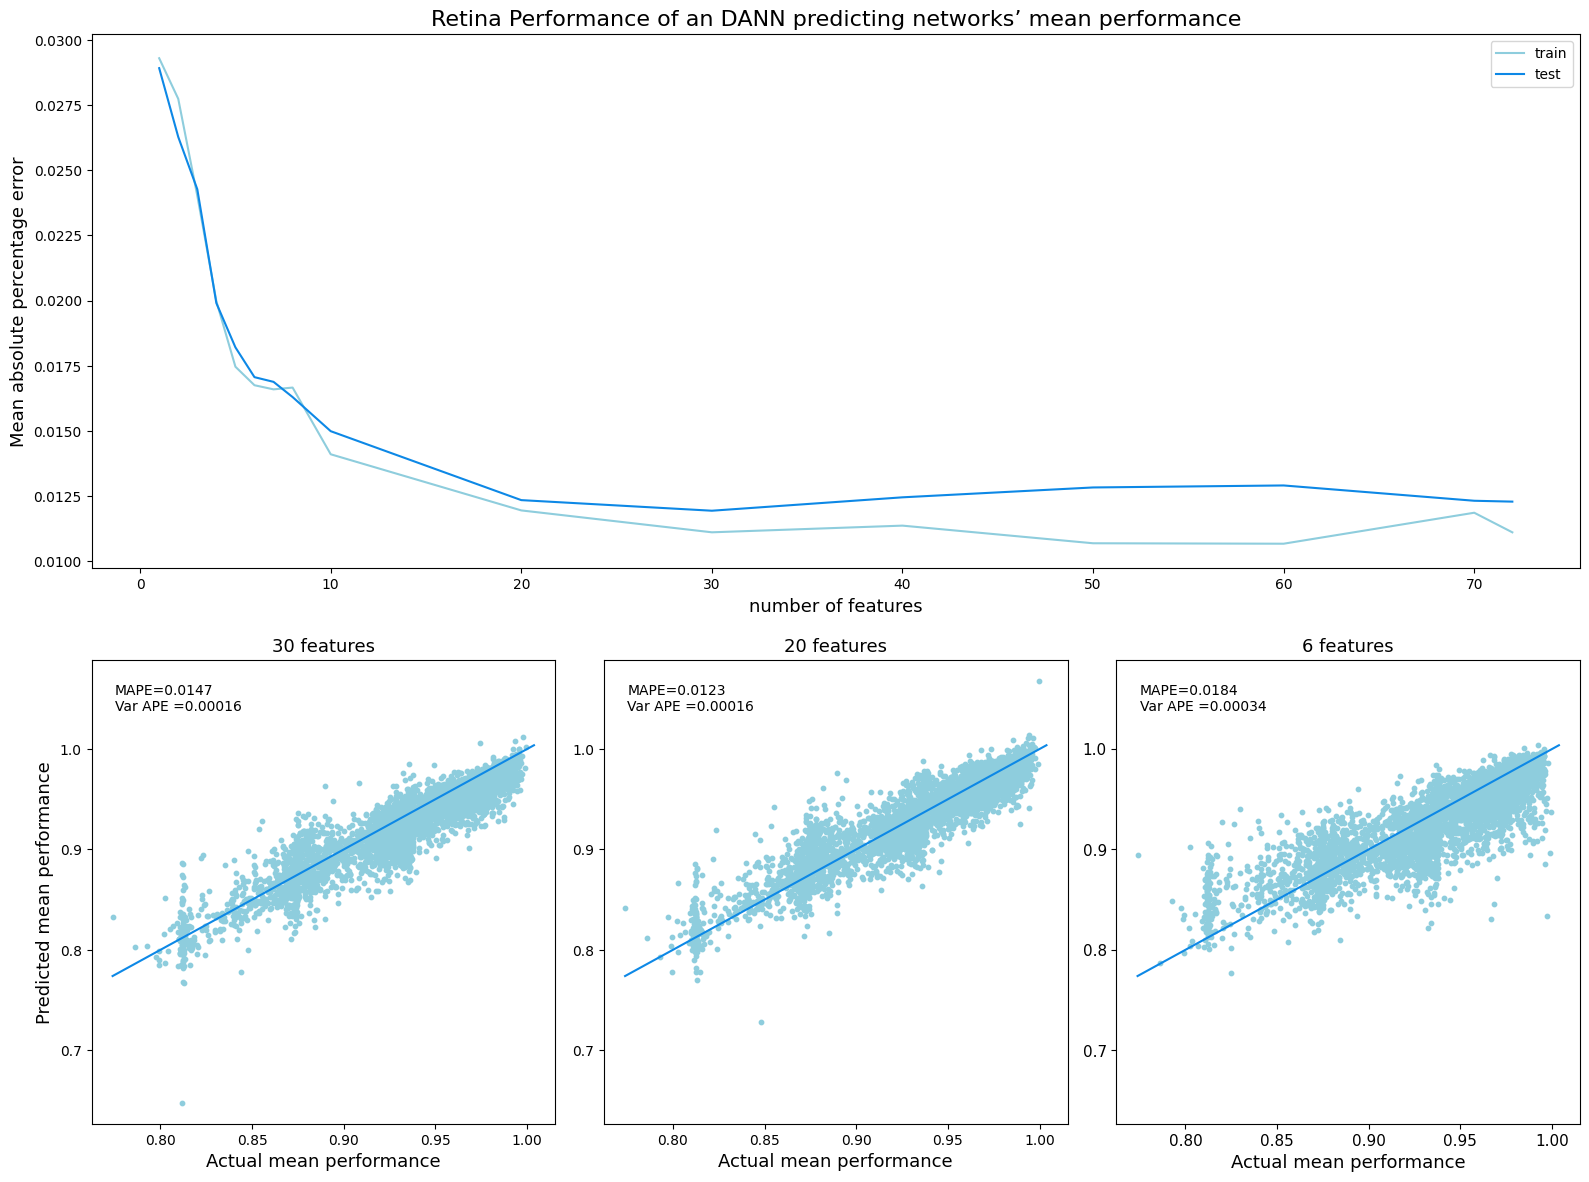

In [133]:

models =  (model_prediction_res_max, model_prediction_res_set, model_prediction_res)
start = min(min( model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min()) for model in models)
stop = max(max( model_prediction_res['test_label'].max(), model_prediction_res['test_pred'].max()) for model in models)
fig = plt.figure(figsize=(16,12))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(234)
ax2 = fig.add_subplot(235,  sharex=ax1, sharey=ax1 )
ax3 = fig.add_subplot(236,  sharex=ax1, sharey=ax1 )

for ax, model, num_fet in zip((ax1, ax2, ax3),models, fetureas):
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=blues[1])
    mape, var = abs_percentage_error(model['test_label'], model['test_pred'])
    print(men_a(torch.tensor(model['test_label']), torch.tensor(model['test_pred'])))
    textstr = '\n'.join((
        r'MAPE=%.4f' % (mape),
        r'Var APE =%.5f' % (var)))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', )
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=blues[0])
    ax.set_title(
    f"{num_fet} features",
    wrap=True, fontsize=13)
    ax.set_xlabel('Actual mean performance', fontsize=13)

ax1.set_ylabel('Predicted mean performance', fontsize=13)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,wrap=True, fontsize=14)

ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=blues[1])
ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=blues[0])

ax0.set_xlabel('number of features', fontsize=13)
ax0.set_ylabel(f'Mean absolute percentage error', fontsize=13)
ax0.legend()
ax0.set_title(
    f"{task.capitalize()} Performance of an DANN predicting networks’ mean performance",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [98]:
mape, var

(0.018361579385193925, 0.0003390625285364714)

In [69]:
[model_prediction_res['test_label'].min(), model_prediction_res['test_pred'].min(), model_prediction_res_max['test_label'].min(), model_prediction_res_max['test_pred'].min()]

[0.77390623, 0.77742165, 0.7739062309265137, 0.7283614873886108]

In [11]:
n_features = 6
baseline_path = f"{results_path}/{res_folder}/random_feature_selection/{n_features}_features/teach_archs_regression_random_feature_selection_results"
res_baseline = pd.DataFrame()
for file_name in os.listdir(baseline_path):
    if '_output_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{baseline_path}/{file_name}")
    res_baseline = pd.concat([res_baseline, temp], ignore_index=True)

In [22]:
correlated_path = f"{results_path}/{res_folder}/feature_correlation/{n_features}_features"
for file_name in os.listdir(correlated_path):
    if '_output_best.csv' not in file_name:
        continue
    res_corr = pd.read_csv(f"{correlated_path}/{file_name}")

In [8]:
globality_path = f"{results_path}/{res_folder}/feature_globality/{n_features}_features/teach_archs_regression_feature_selection_results"
globality_baseline_res = pd.DataFrame()
for file_name in os.listdir(globality_path):
    if '_output_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{globality_path}/{file_name}")
    globality_baseline_res = pd.concat([globality_baseline_res, temp], ignore_index=True)

In [35]:
res_baseline.to_csv(f'/Users/noamazmon/{file_name}')

In [19]:
from scipy import stats
stats.ttest_1samp(res_baseline['best mape test'], 0.017062)


TtestResult(statistic=47.52859615403115, pvalue=2.1041714720095757e-141, df=299)

In [25]:
stats.ttest_1samp(globality_baseline_res['best mape test'], 0.017062, alternative='less')


TtestResult(statistic=42.04848487472326, pvalue=1.0, df=300)

In [22]:
(globality_baseline_res['best mape test'].mean(), globality_baseline_res['best mape test'].std())

(0.02317944908718824, 0.0025240808380881763)

In [32]:
import numpy as np
import scipy.stats as stats

# Given information
alpha = 0.05

# compute the z-score
z_score = (0.017062-globality_baseline_res['best mape test'].mean())/(globality_baseline_res['best mape test'].std())
print('Z-Score :',z_score)

# Approach 1: Using Critical Z-Score

# Critical Z-Score
z_critical = stats.norm.ppf(1-alpha)
print('Critical Z-Score :',z_critical)

# Hypothesis
if z_score >  z_critical:
    print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

# Approach 2: Using P-value

# P-Value : Probability of getting less than a Z-score
p_value = 1-stats.norm.cdf(z_score)

print('p-value :',p_value)

# Hypothesis
if p_value <  alpha:
    print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Z-Score : -2.4236343760771946
Critical Z-Score : 1.6448536269514722
Fail to Reject Null Hypothesis
p-value : 0.9923169663830013
Fail to Reject Null Hypothesis


In [31]:
z_score = (0.017062 - res_baseline['best mape test'].mean()) / (
    res_baseline['best mape test'].std())
print('Z-Score :', z_score)

# Approach 1: Using Critical Z-Score

# Critical Z-Score
z_critical = stats.norm.ppf(1 - alpha)
print('Critical Z-Score :', z_critical)

# Hypothesis
if z_score > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

# Approach 2: Using P-value

# P-Value : Probability of getting less than a Z-score
p_value = 1 - stats.norm.cdf(z_score)

print('p-value :', p_value)

# Hypothesis
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Z-Score : -2.7440647783734895
Critical Z-Score : 1.6448536269514722
Fail to Reject Null Hypothesis
p-value : 0.9969658219064771
Fail to Reject Null Hypothesis


In [23]:
(globality_baseline_res['best mape test'].mean() - 0.017062)/ globality_baseline_res['best mape test'].std()

2.4236343760771946

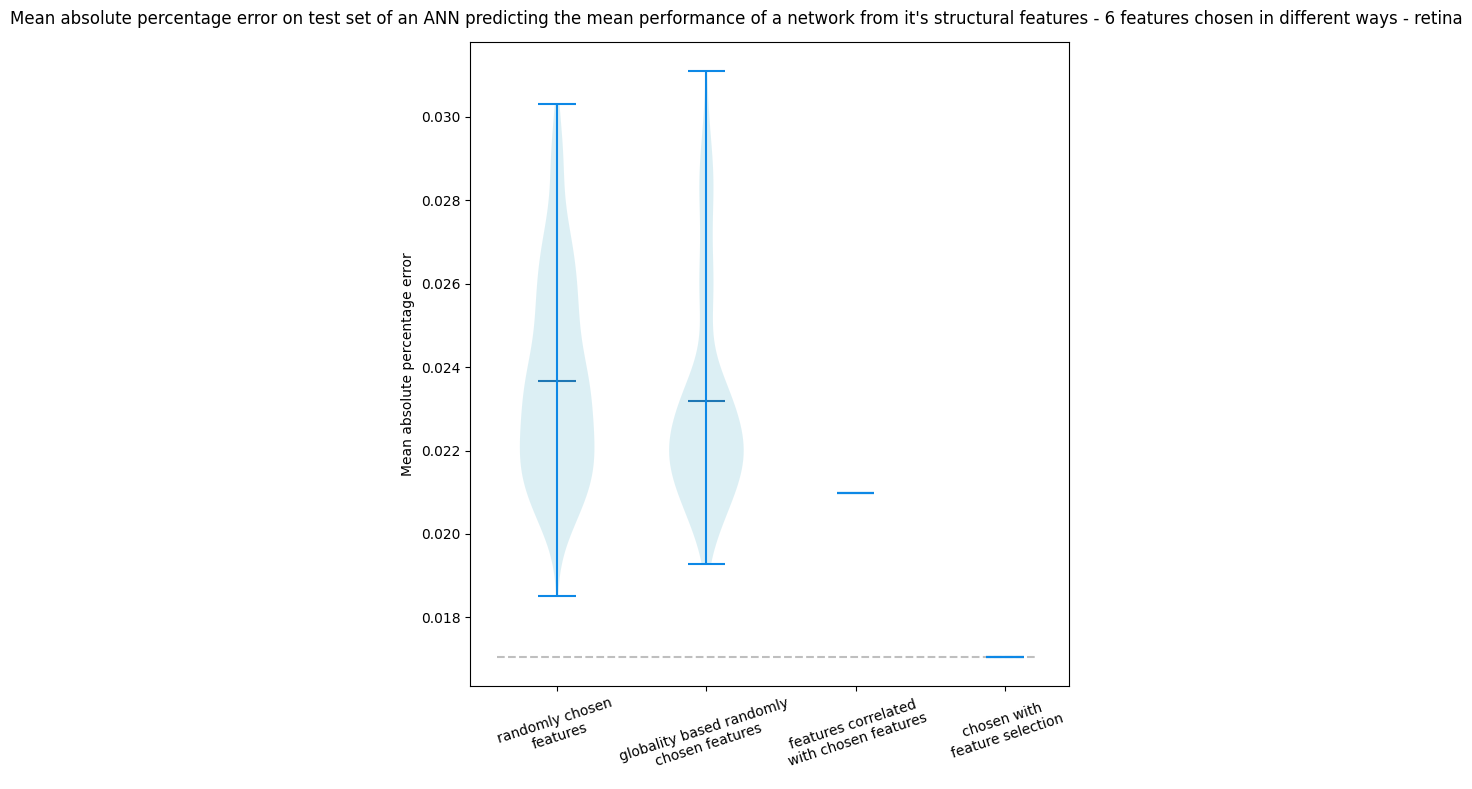

In [26]:
all_data = [
    res_baseline['best mape test'],
    globality_baseline_res['best mape test'],
    res_corr['best mape test'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures',
    'globality based randomly\nchosen features',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )

plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(blues[1])
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = parts[partname]
    vp.set_edgecolor(blues[0])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

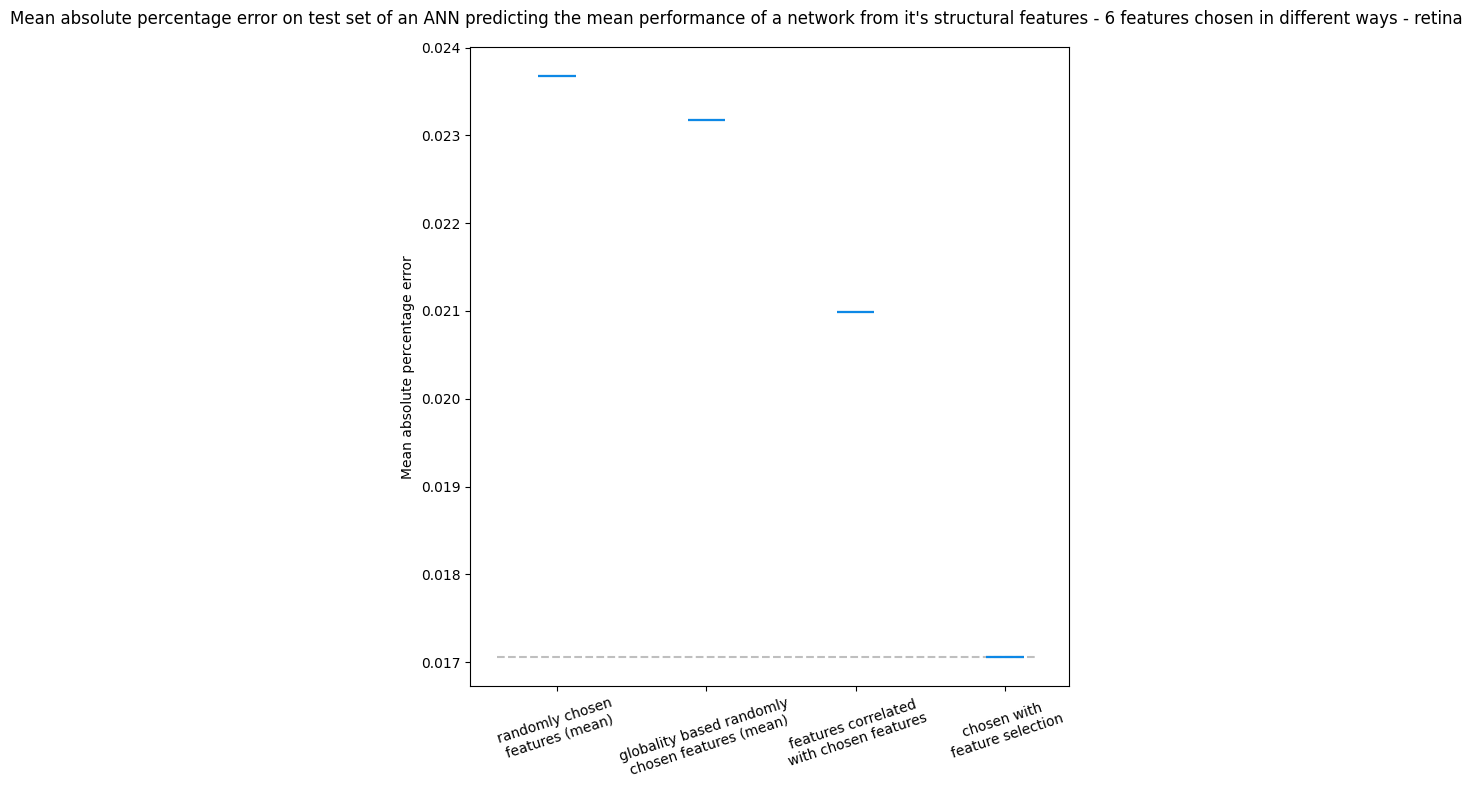

In [27]:
all_data = [
    res_baseline['best mape test'].mean(),
    globality_baseline_res['best mape test'].mean(),
    res_corr['best mape test'],
    feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features],
]
labels = [
    'randomly chosen\nfeatures (mean)',
    'globality based randomly\nchosen features (mean)',
    'features correlated\nwith chosen features',
    'chosen with\nfeature selection',
]
plt.figure(figsize=(7, 8), )
plt.hlines(y=feature_selection_res['best mape test'][feature_selection_res['num_features'] == n_features], xmin=0.6,
           xmax=len(all_data) + 0.2, colors='grey', linestyles='--', alpha=0.5,
           label='features correlated with chosen features')
parts = plt.violinplot(all_data,
                       vert=True,
                       showmeans=True,
                       # vertical box alignment
                       #labels=labels
                       )
for pc in parts['bodies']:
    pc.set_facecolor(blues[1])
for partname in ('cbars', 'cmins', 'cmaxes',):
    vp = parts[partname]
    vp.set_edgecolor(blues[0])
plt.xticks([y + 1 for y in range(len(all_data))],
           labels=labels, rotation=18)
plt.ylabel(f'Mean absolute percentage error')
plt.suptitle(
    f"Mean absolute percentage error on test set of an ANN predicting the mean performance of a network from it's structural features - {n_features} features chosen in different ways - {task}",
    #loc='center',
    wrap=True)
plt.savefig(f"{plot_path}/{time_str}_mean_differently_chosen_features_{n_features}_features_means.png")
plt.tight_layout()
plt.show()

In [28]:
orignaly_chosen_features_values = pd.read_csv(f"{lgb_res_path}/{n_features}_feature_values.csv").drop("Unnamed: 0",
                                                                                                      axis=1)
originaly_selected_feature_names = list(orignaly_chosen_features_values.columns)[:-1]

corrlated_selected_feature_names = [
    correlated_features[feature].drop(index=feature).idxmax()
    for feature in originaly_selected_feature_names
]

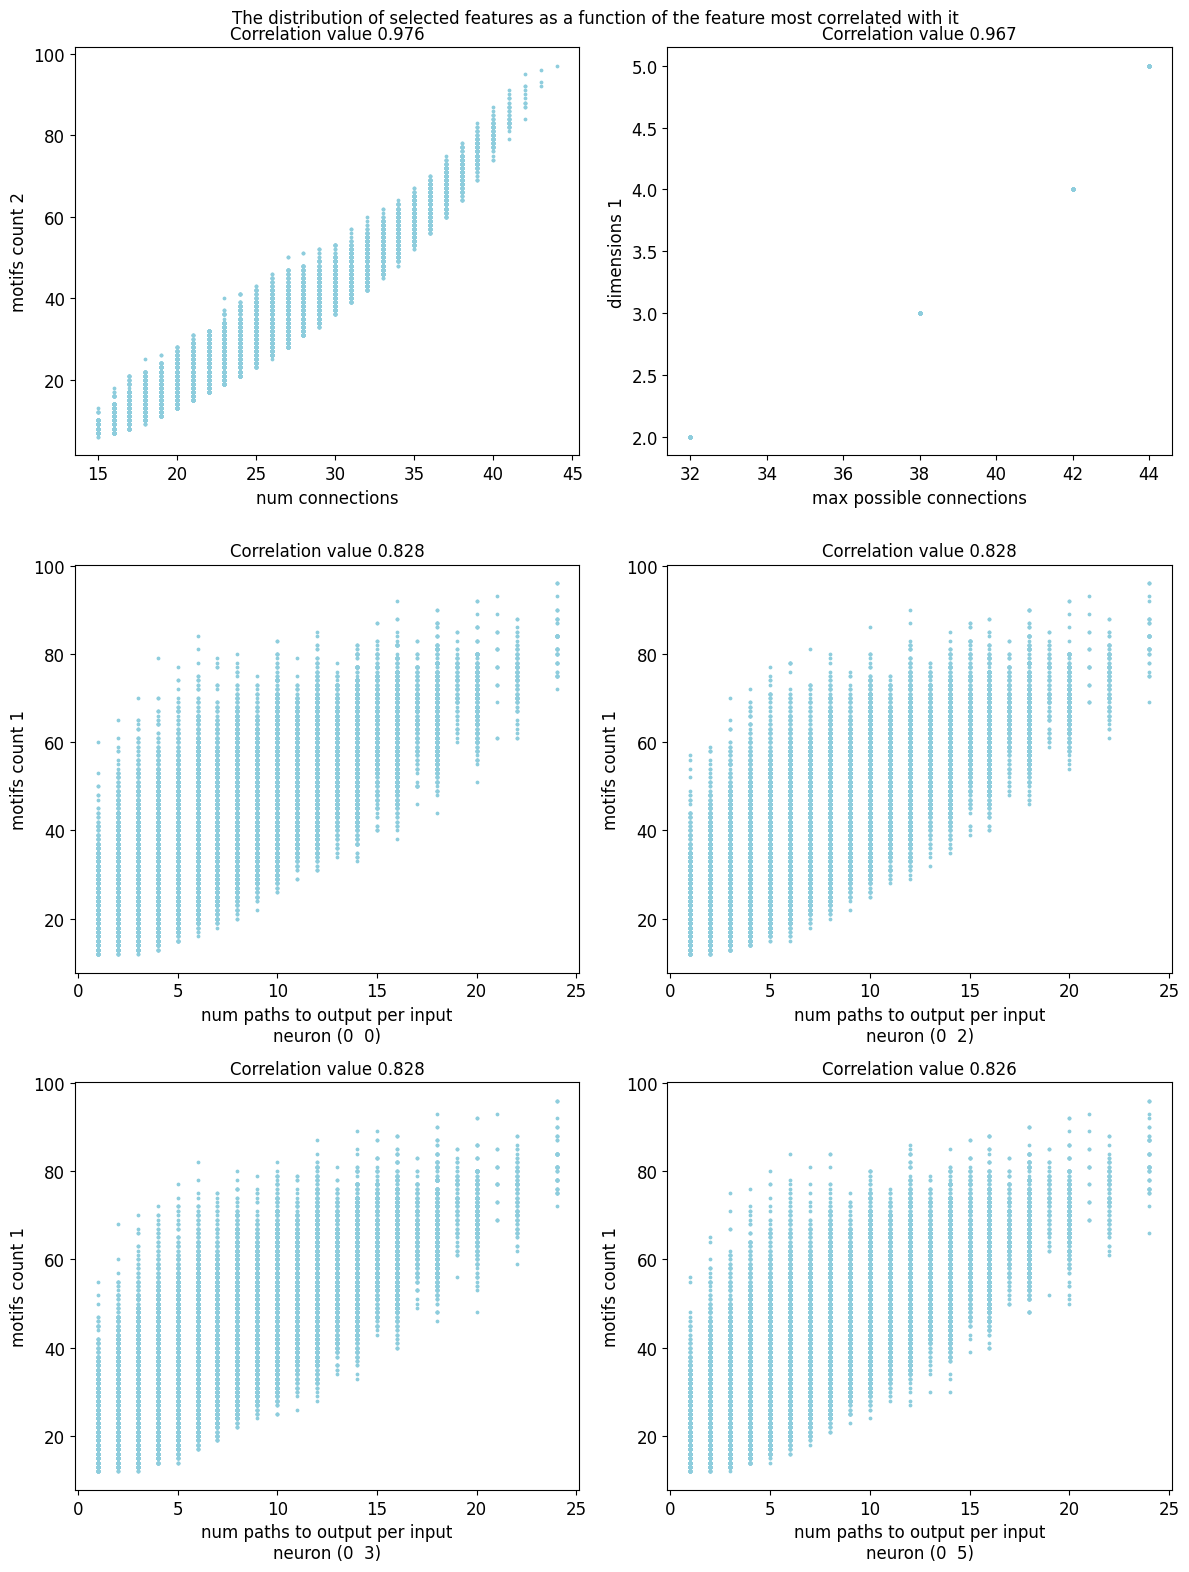

In [29]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    axs[i, j].scatter(corrlated_features_values[origin_f_name], corrlated_features_values[coor_f_name],
                      color=blues[1], s=3)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(f"The distribution of selected features as a function of the feature most correlated with it")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_correlated_features_dist.png")


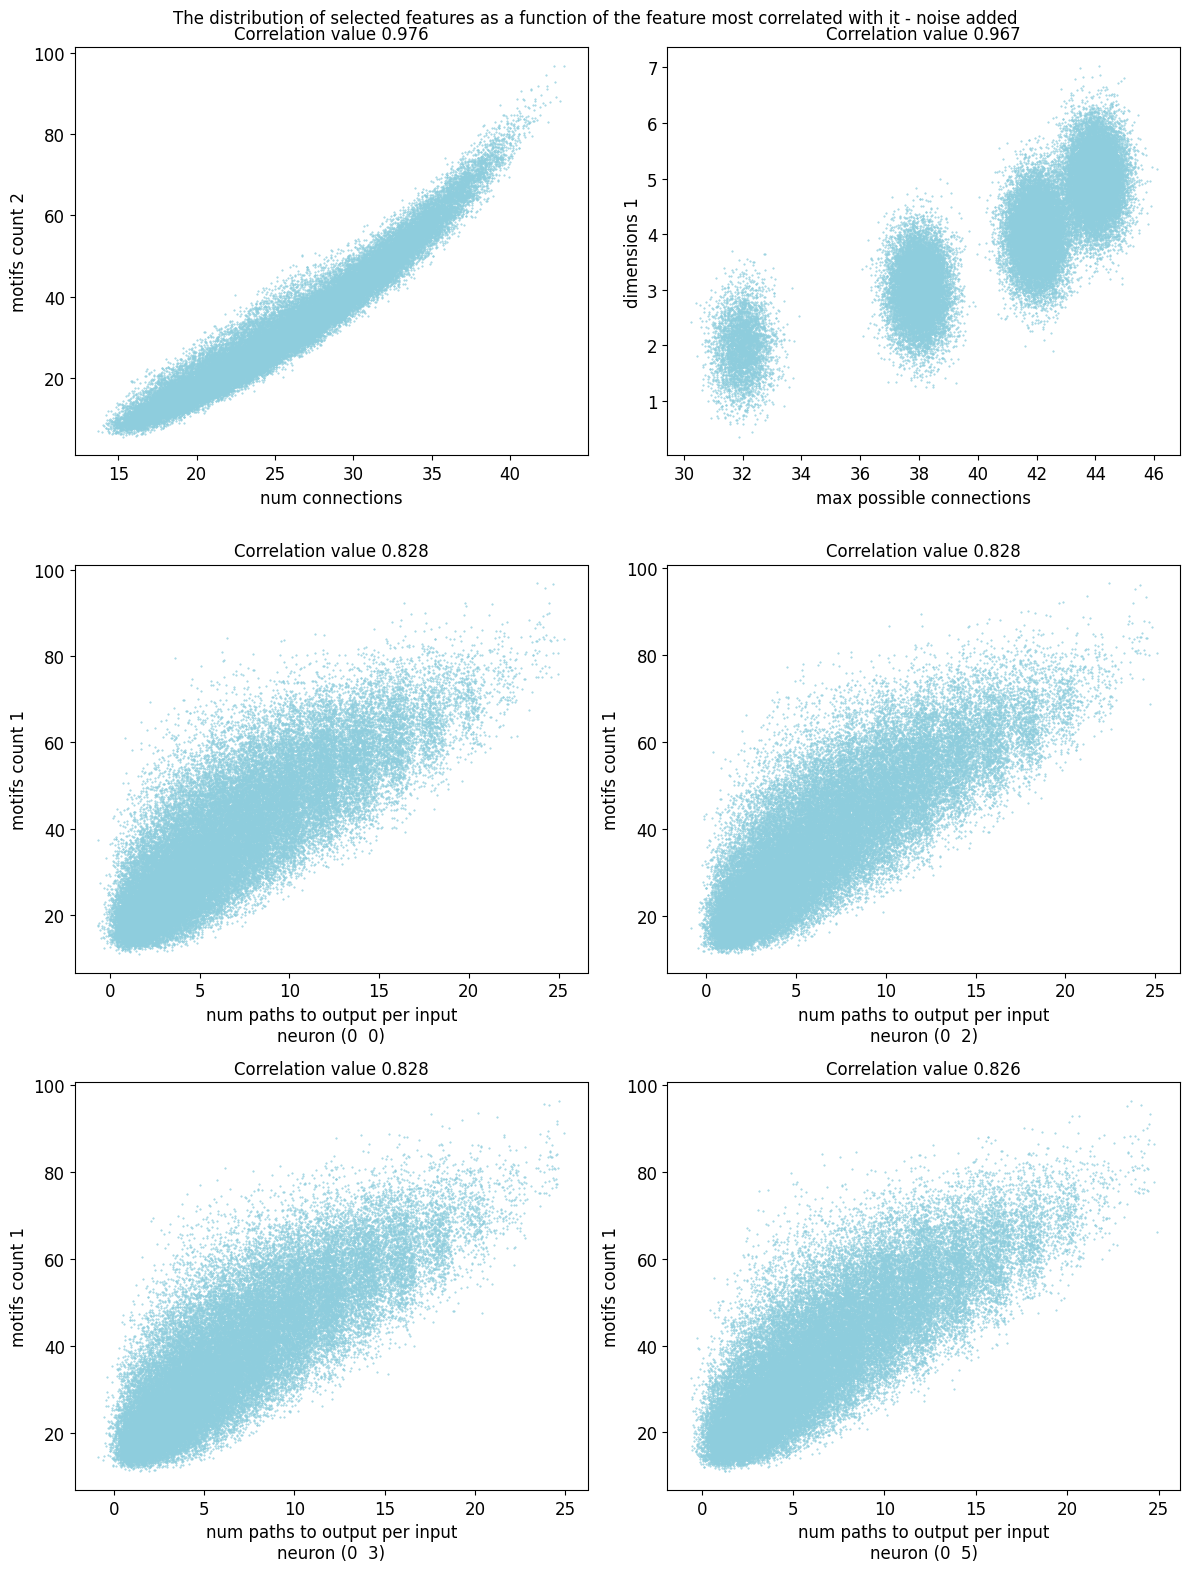

In [30]:
num_columns = int(np.ceil(len(originaly_selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(12, 16), )
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (origin_f_name, coor_f_name, (i, j)) in enumerate(
        zip(originaly_selected_feature_names, corrlated_selected_feature_names, idxs)):
    correlation_val = round(correlated_features[origin_f_name].loc[coor_f_name], 3)
    x_data = corrlated_features_values[origin_f_name]
    y_data = corrlated_features_values[coor_f_name]
    axs[i, j].scatter(x_data + np.random.normal(scale=0.5, size=x_data.shape[0]),
                      y_data + np.random.normal(scale=0.5, size=y_data.shape[0]),
                      color=blues[1], s=0.2)
    axs[i, j].set_xlabel(textwrap.fill(origin_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_ylabel(textwrap.fill(coor_f_name.replace('_', ' '), width=30,
                                       break_long_words=False), fontsize=12)
    axs[i, j].set_title(f'Correlation value {correlation_val}')
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
plt.suptitle(
    f"The distribution of selected features as a function of the feature most correlated with it - noise added")
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{n_features}_noise_correlated_features_dist.png")


In [31]:
correlated_features

,connectivity_ratio,num_connections,max_possible_connections,out_connections_per_layer_(0_ 0),out_connections_per_layer_(0_ 1),out_connections_per_layer_(0_ 2),out_connections_per_layer_(0_ 3),out_connections_per_layer_(0_ 4),out_connections_per_layer_(0_ 5),out_connections_per_layer_(1_ 0),...,num_paths_to_output_per_input_neuron_(0_ 1),num_paths_to_output_per_input_neuron_(0_ 2),num_paths_to_output_per_input_neuron_(0_ 3),num_paths_to_output_per_input_neuron_(0_ 4),num_paths_to_output_per_input_neuron_(0_ 5),motifs_count_0,motifs_count_1,motifs_count_2,dimensions_1,dimensions_2
connectivity_ratio,1.000000,0.915320,0.144506,0.504560,0.498582,0.505195,0.500187,0.499406,0.502110,0.466814,...,0.794818,0.796634,0.797475,0.796370,0.796156,0.866712,0.942618,0.916886,0.135956,0.135956
num_connections,0.915320,1.000000,0.259279,0.656808,0.653616,0.659081,0.654774,0.653080,0.656138,0.226741,...,0.761030,0.761547,0.762356,0.759551,0.760145,0.969541,0.901210,0.975508,0.251028,0.251028
max_possible_connections,0.144506,0.259279,1.000000,0.393333,0.400127,0.397618,0.398903,0.397481,0.398122,0.544126,...,0.025395,0.028208,0.028146,0.031731,0.030176,0.290018,0.032294,0.189821,0.967454,0.967454
out_connections_per_layer_(0_ 0),0.504560,0.656808,0.393333,1.000000,0.447406,0.446433,0.444681,0.441539,0.441462,0.061755,...,0.339510,0.337208,0.338497,0.335289,0.333662,0.678702,0.471454,0.654151,0.404301,0.404301
out_connections_per_layer_(0_ 1),0.498582,0.653616,0.400127,0.447406,1.000000,0.443130,0.445128,0.441961,0.442035,0.067933,...,0.693899,0.331893,0.336474,0.329807,0.331956,0.674288,0.465615,0.649922,0.411593,0.411593
out_connections_per_layer_(0_ 2),0.505195,0.659081,0.397618,0.446433,0.443130,1.000000,0.451780,0.444981,0.448505,0.064619,...,0.337693,0.694966,0.342623,0.336148,0.337644,0.679998,0.471498,0.656192,0.408023,0.408023
out_connections_per_layer_(0_ 3),0.500187,0.654774,0.398903,0.444681,0.445128,0.451780,1.000000,0.444385,0.446923,0.070943,...,0.335277,0.335276,0.691626,0.331280,0.331349,0.678254,0.464906,0.652123,0.410951,0.410951
out_connections_per_layer_(0_ 4),0.499406,0.653080,0.397481,0.441539,0.441961,0.444981,0.444385,1.000000,0.448029,0.069252,...,0.332850,0.332418,0.332801,0.690403,0.333309,0.675217,0.464245,0.650660,0.408529,0.408529
out_connections_per_layer_(0_ 5),0.502110,0.656138,0.398122,0.441462,0.442035,0.448505,0.446923,0.448029,1.000000,0.065654,...,0.335041,0.335800,0.335198,0.334769,0.692882,0.677042,0.468092,0.653589,0.408344,0.408344
out_connections_per_layer_(1_ 0),0.466814,0.226741,0.544126,0.061755,0.067933,0.064619,0.070943,0.069252,0.065654,1.000000,...,0.368218,0.368462,0.367539,0.370734,0.368995,0.167490,0.484317,0.222825,0.542887,0.542887


In [32]:
NICE_FEATURES = [
    'connectivity_ratio',
    'num_connections',
    'max_possible_connections',
    'out_connections_per_layer',
    'in_connections_per_layer',
    'total_connectivity_ratio_between_layers',
    'max_connectivity_between_layers_per_layer',
    'layer_connectivity_rank',
    'distances_between_input_neuron',
    'num_paths_to_output_per_input_neuron',
    'num_involved_neurons_in_paths_per_input_neuron',
    'motifs_count',
    'dimensions',
    'num_layers',
    'num_neurons'
]
all_ticks = []
for feature_full_name in correlated_features.columns:
    for feature_general_name in NICE_FEATURES:
        if feature_general_name == 'connectivity_ratio' and feature_general_name != feature_full_name:
            continue
        if feature_general_name in feature_full_name:
            all_ticks.append(feature_general_name)
labels = []
for name in all_ticks:
    if name not in labels:
        labels.append(name)
texts = []
colors_ = []
for i, tick in enumerate(labels):
    temp = [i for i, val in enumerate(all_ticks) if val == tick]
    tick = tick.replace('connectivity_ratio', 'density').replace('_', ' ')
    if len(temp) == 1:
        texts.append(f"{temp[0]}: {tick}")
    else:
        texts.append(f"{temp[0]} - {temp[-1]}: {tick}")
    for j in range(temp[-1] - temp[0] + 1):
        colors_.append(COLORS_20[i])

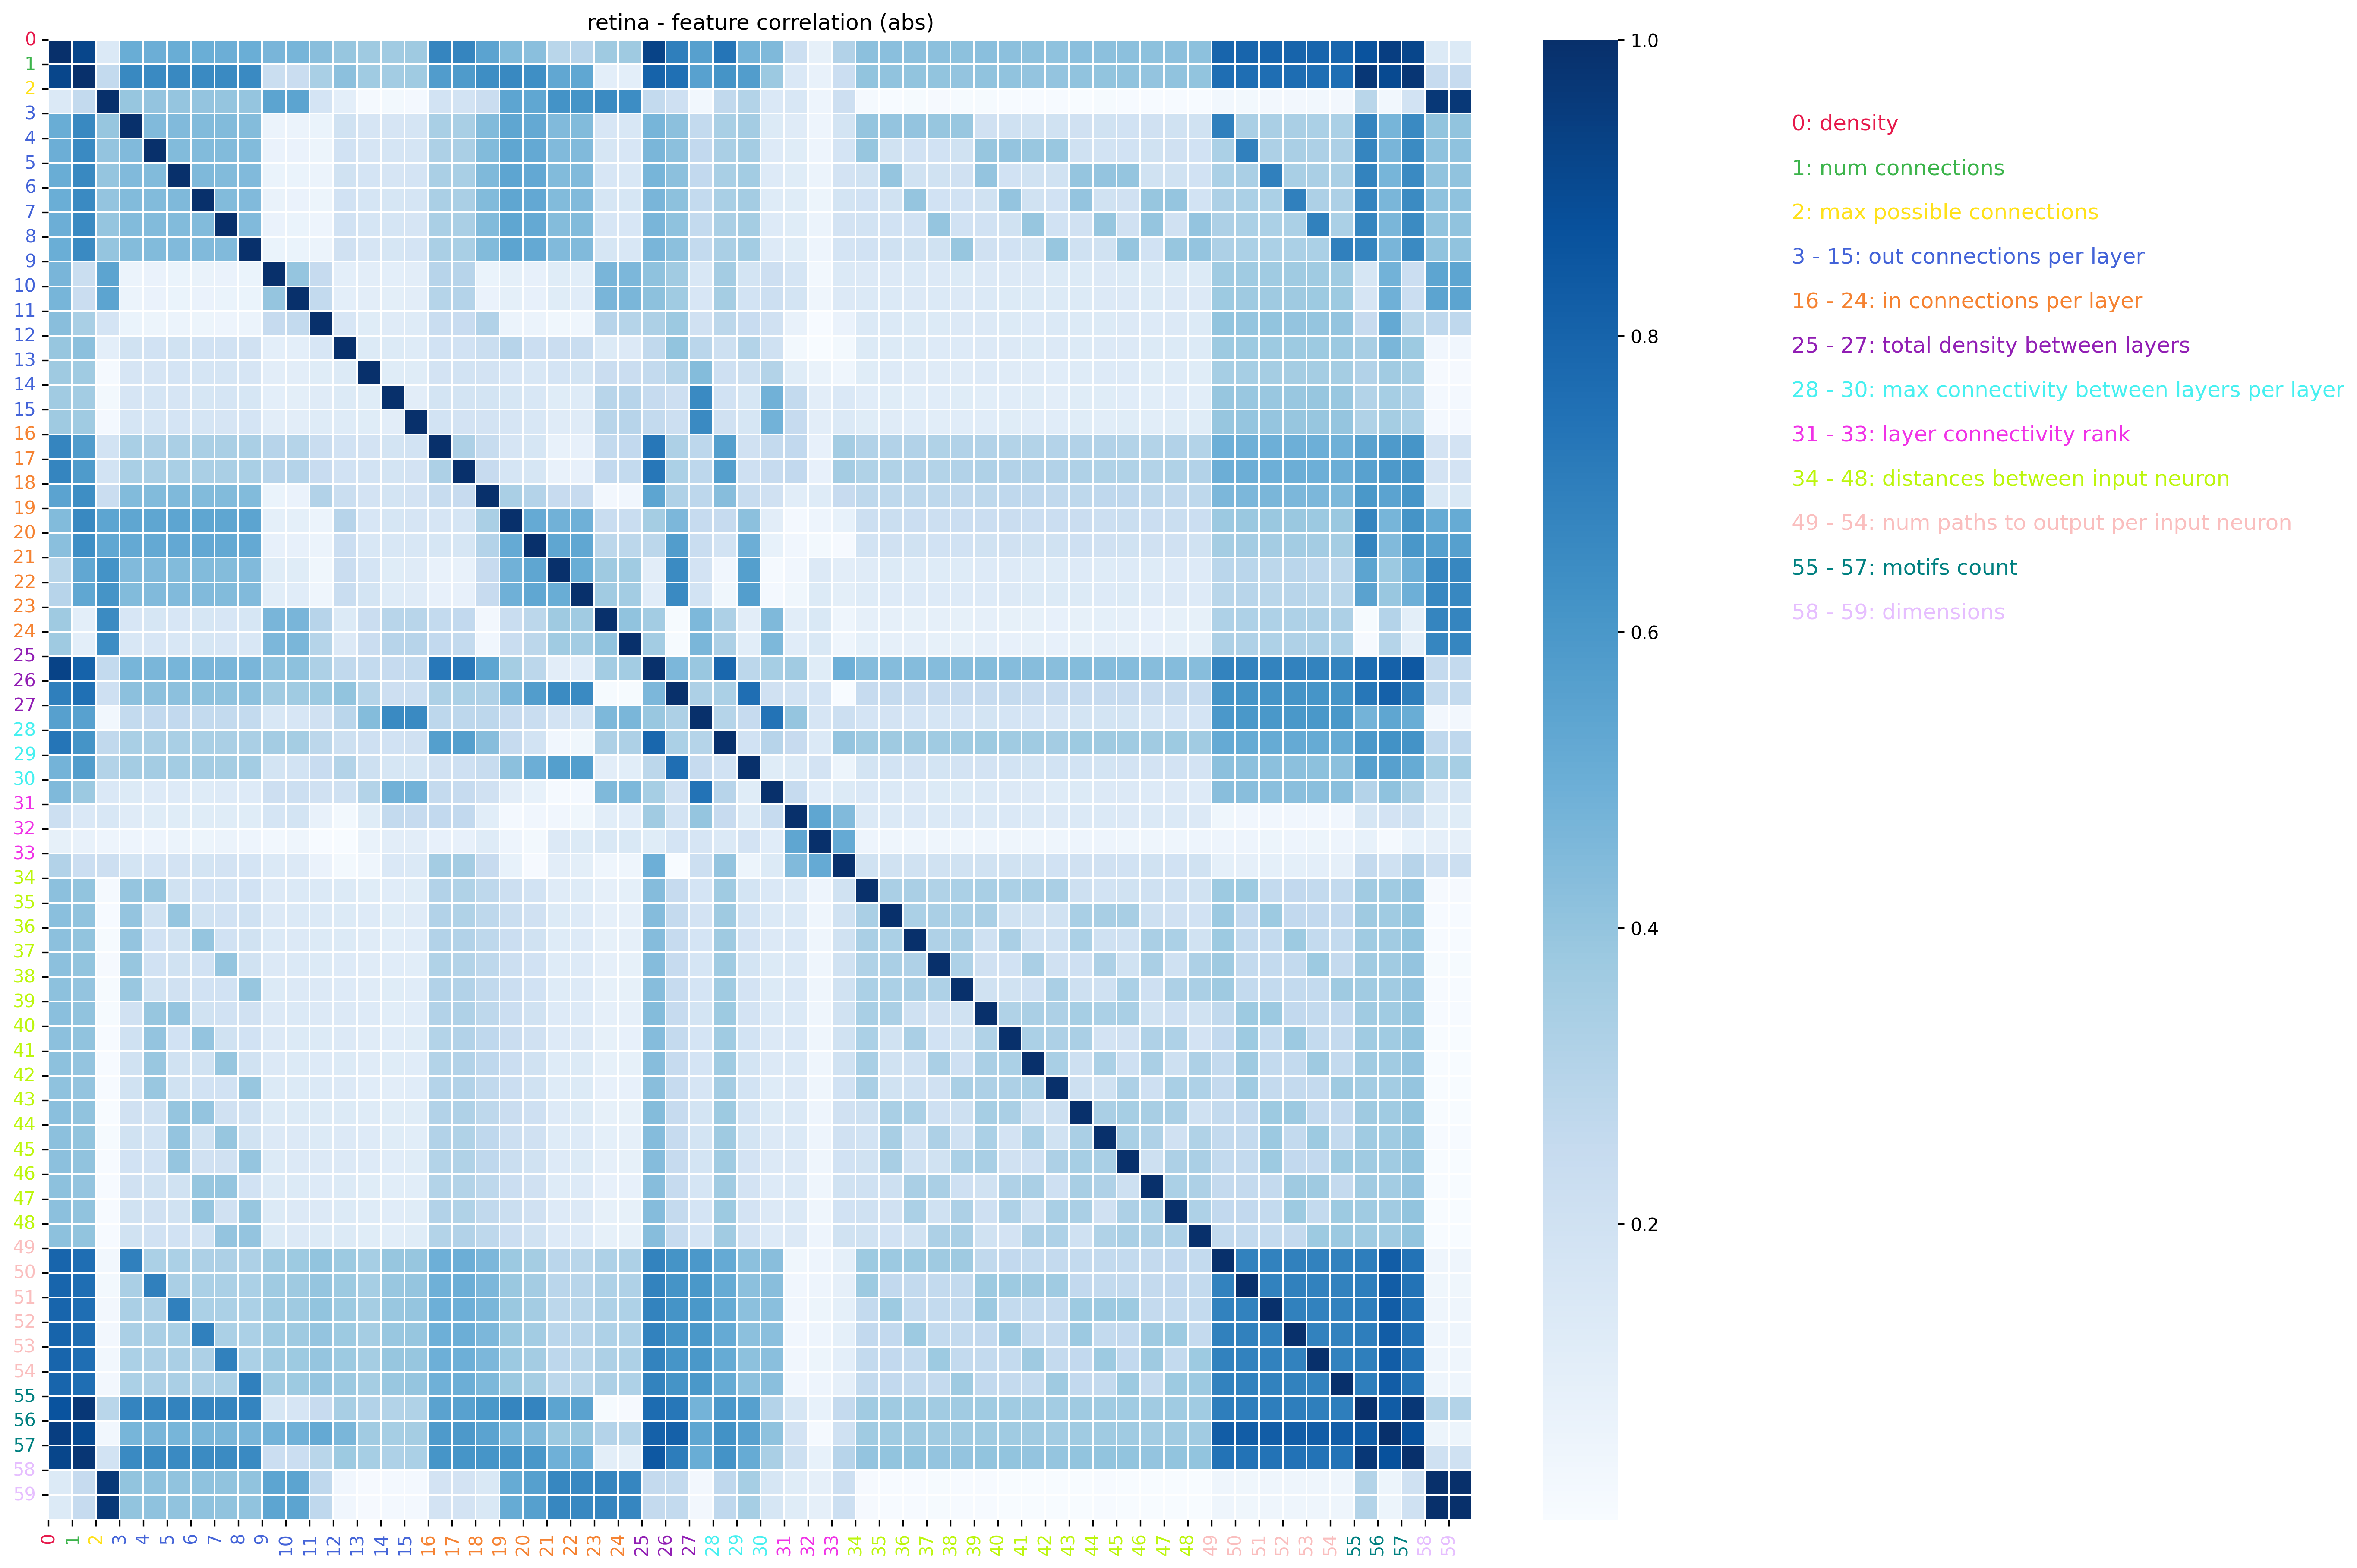

a


In [33]:
col = 'Blues'

fig = plt.figure(figsize=(18, 12), constrained_layout=True, dpi=300)
gs = fig.add_gridspec(2, 4)
axs = []
axs.append(fig.add_subplot(gs[:, 3]))
axs.append(fig.add_subplot(gs[:, 0:3]))  # large subplot (2 rows, 2 columns)
axtxt, ax = axs
c = sns.color_palette(col, as_cmap=True)
ax = sns.heatmap(correlated_features, linewidth=0.5, cmap=c, )
ax.set_xticks(range(0, correlated_features.shape[0], 1))
ax.set_xticklabels(list((range(0, correlated_features.shape[0], 1))))
ax.set_yticks(range(0, correlated_features.shape[0], 1))
ax.set_yticklabels(list((range(0, correlated_features.shape[0], 1))))
for xtick, yticks, color, in zip(ax.get_xticklabels(), ax.get_yticklabels(), colors_):
    xtick.set_color(color)
    yticks.set_color(color)
axtxt.set_axis_off()
left, width = 0.0, .5
top, height = 0.95, 1
right = left + width
bottom = top - height
for i, (t, c) in enumerate(zip(texts, COLORS_20)):
    axtxt.text(0.5 * (left + right), ((top) - i * 0.03), t,
               horizontalalignment='left',
               verticalalignment='top',
               fontsize=12, color=c,
               #  transform=axtxt.transAxes,
               )
plt.title(f"{task} - feature correlation (abs)")
plt.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation.png")
plt.show()
print('a')




<Figure size 7800x7200 with 0 Axes>

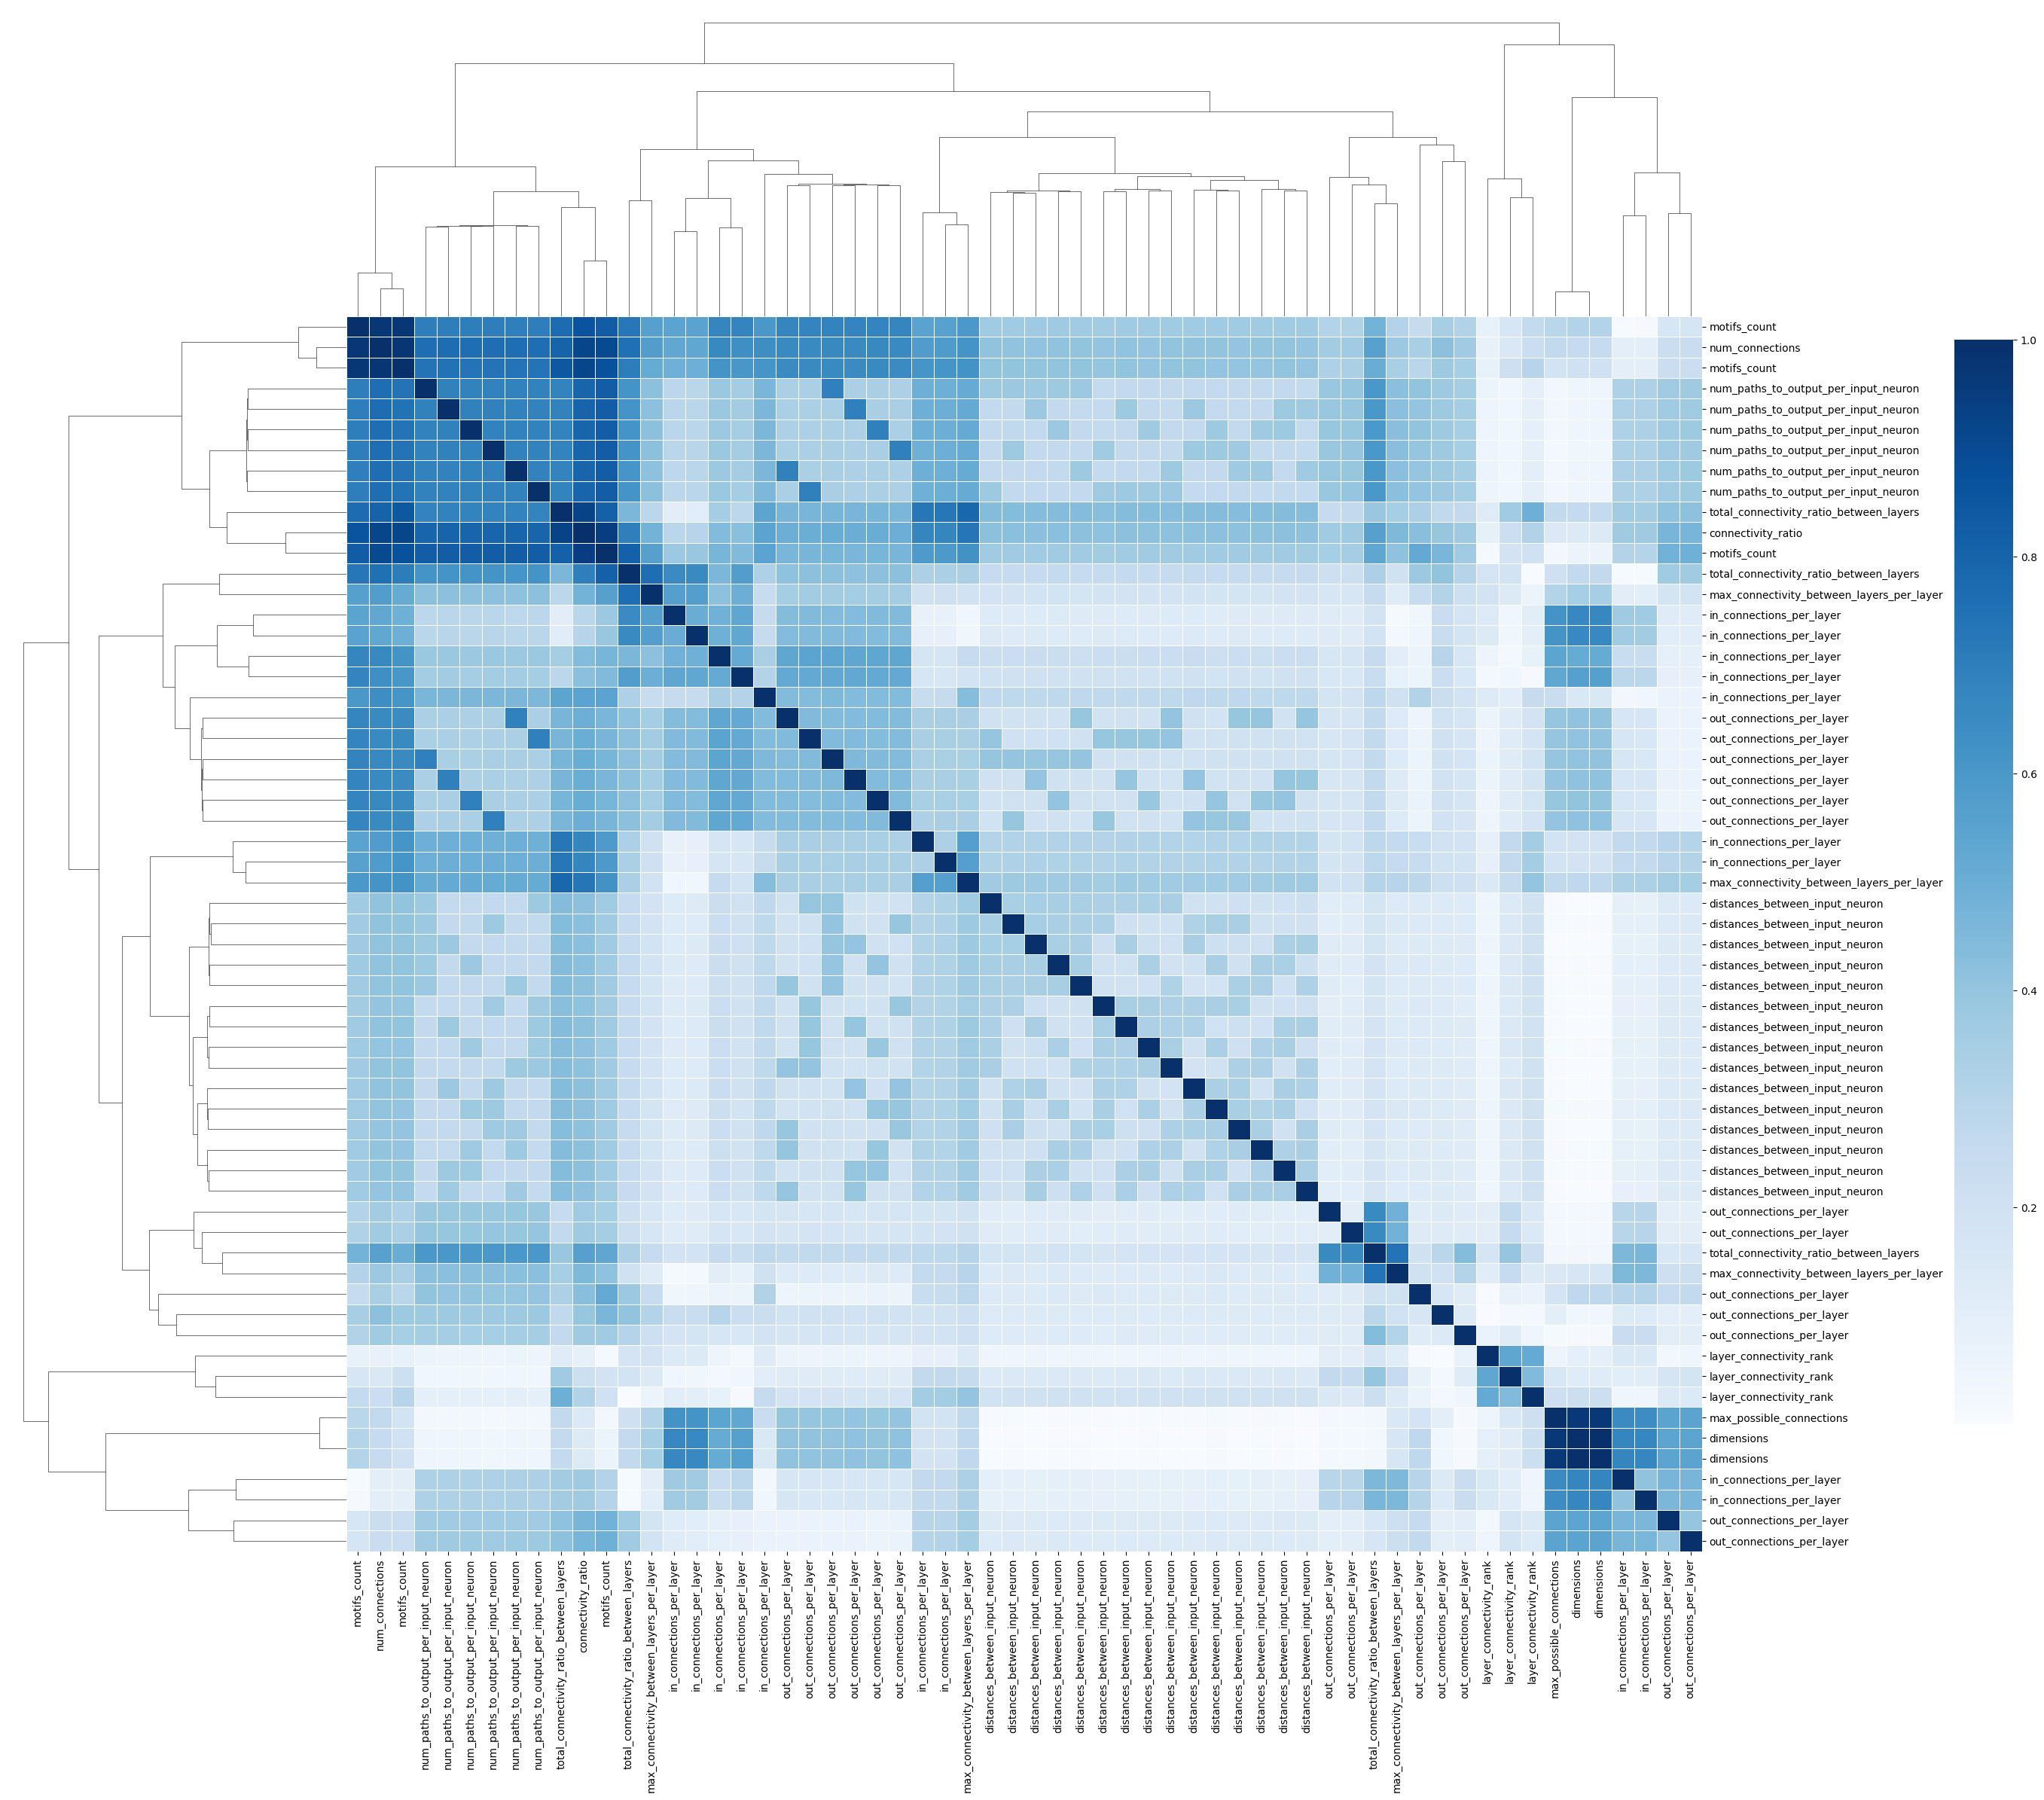

In [34]:
plt.figure(figsize=(26,24), dpi = 300)
c = sns.color_palette(col, as_cmap=True)
correlated_features_new_name = correlated_features.copy()
correlated_features_new_name.columns = all_ticks
correlated_features_new_name.index = all_ticks
s =sns.clustermap(correlated_features_new_name, linewidth=0.5, cmap=c,cbar_pos=(1,0.21,0.03,0.6,),figsize=(26,24))
s.savefig(
    f"{plot_path}/{time_str}_{task}_feature_correlation_with_clustering.png")
plt.show()

In [35]:
lgb_res_small_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/teach_archs_regression_feature_selection_results_small_ann"
num_features = []
feature_selection_small_ann_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_small_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_small_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_small_ann_res = pd.concat([feature_selection_small_ann_res, temp], ignore_index=True)
feature_selection_small_ann_res = feature_selection_small_ann_res.sort_values('num_features')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/noamaz/modularity/retina_xor//retina_3_layers/lightgbm_feature_selection/exp_2023-11-27-15-51-15_nice_features/teach_archs_regression_feature_selection_results_small_ann'

In [ ]:
plt.plot(feature_selection_small_ann_res['num_features'], feature_selection_small_ann_res['best mape train'],
         label='train', c=blues[1])
plt.plot(feature_selection_small_ann_res['num_features'], feature_selection_small_ann_res['best mape test'],
         label='test', c=blues[0])

plt.xlabel('number of features', fontsize=12)
plt.ylabel(f'Mean absolute percentage error', fontsize=12)
plt.legend()
plt.title(
    f"Prediction of an ANN based on structural features {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_small_ann.png")
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
max_y = max((feature_selection_res['best mape test'].max(), feature_selection_res['best mape train'].max(),
             feature_selection_small_ann_res['best mape test'].max(),
             feature_selection_small_ann_res['best mape train'].max()))
min_y = min((feature_selection_res['best mape test'].min(), feature_selection_res['best mape train'].min(),
             feature_selection_small_ann_res['best mape test'].min(),
             feature_selection_small_ann_res['best mape train'].min()))
ax1.vlines(ymax=max_y, x=n_features, ymin=min_y, color='grey', linestyles='--', alpha=0.8)
ax2.vlines(ymax=max_y, x=n_features, ymin=min_y, color='grey', linestyles='--', alpha=0.8)
ax1.plot(feature_selection_small_ann_res['num_features'], feature_selection_small_ann_res['best mape train'],
         label='samll ANN', c=blues[1])
ax1.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='big ANN', c=blues[0])
ax2.plot(feature_selection_small_ann_res['num_features'], feature_selection_small_ann_res['best mape test'],
         label='samll ANN', c=blues[1])
ax2.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='big ANN', c=blues[0])

ax1.set_xlabel('number of features', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.set_title('train data')
ax2.set_title('test data')
ax1.legend()
ax2.legend()
plt.suptitle(
    f"Prediction of an ANN based on structural features {task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_big_vs_smal_ann.png")
plt.show()